# <center>  Python for biologists

## Lecture 10, Pandas
11.11.2023


> Nikita Vaulin, vaulin@ro.ru, tg: @nvaulin
    

---

<a href="https://pandas.pydata.org/">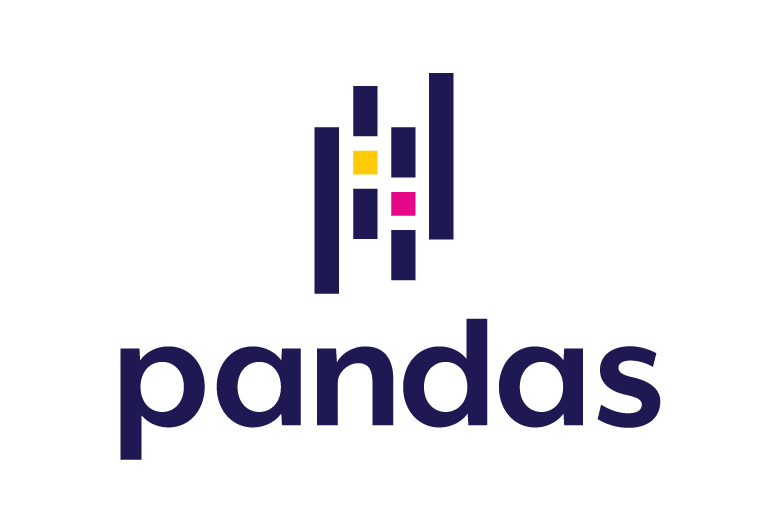</a>
## Pandas: Python Data Analysis Library

Основаная библиотека для работы с дата-фреймами в python


In [1]:
! pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ключевая структурная единица - `pd.Series`

In [3]:
print([10, 20, 30])
print(np.array([10, 20, 30]))
print(pd.Series([10, 20, 30]))

[10, 20, 30]
[10 20 30]
0    10
1    20
2    30
dtype: int64


In [4]:
var = pd.Series([10, '20', True])
print(var)

0      10
1      20
2    True
dtype: object


In [5]:
np.array([10, '20', True])

array(['10', '20', 'True'], dtype='<U21')

In [6]:
type(var[1])

str

In [7]:
type(var[0])

int

In [8]:
pd.Series([10, 20, True], dtype='int64')

0    10
1    20
2     1
dtype: int64

In [9]:
var.index

RangeIndex(start=0, stop=3, step=1)

In [10]:
var

0      10
1      20
2    True
dtype: object

In [11]:
print(pd.Series([10, 20, 30], index=['apple', 'banana', 'garlic']))

apple     10
banana    20
garlic    30
dtype: int64


In [12]:
var = pd.Series([10, 20, 30], index=['apple', 'banana', 'garlic'])

In [13]:
var.to_dict()

{'apple': 10, 'banana': 20, 'garlic': 30}

In [14]:
var['apple'] = 9

In [15]:
var

apple      9
banana    20
garlic    30
dtype: int64

## Working with datasets

Sources:

- [Titanic](https://www.kaggle.com/competitions/titanic/overview)
- [Olympics](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)
- [Students Stress Survey](https://www.kaggle.com/datasets/samyakb/student-stress-factors/)
- [Second Wizard War](https://www.kaggle.com/datasets/sheikhsohelmoon/harry-potters-second-wizard-war-dataset)
- [Russian Elections 2018](https://www.kaggle.com/datasets/rexhaif/ru-elections-2018)
- [CTCF and SMC3 ChIP-seqs](https://www.encodeproject.org/search/?type=Experiment&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens&biosample_ontology.classification=primary+cell&biosample_ontology.classification=cell+line&biosample_ontology.classification=in+vitro+differentiated+cells&assay_title=TF+ChIP-seq&biosample_ontology.term_name=neural+cell) 


In [16]:
data_dir = 'https://raw.githubusercontent.com/Python-BI-2023/course_materials/main/data/'
bed_colnames = ('chr', 'start', 'stop', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak')
students_stress = pd.read_csv(data_dir + 'students_stress_survey.csv')
titanic = pd.read_csv(data_dir + 'titanic.csv')
olympics = pd.read_csv('https://github.com/cleuer/olympics/raw/master/src/main/resources/olympic_history_120_years.csv')
second_wiz_war = pd.read_csv(data_dir + 'second_wizard_war.csv')
rus_elections = pd.read_csv(data_dir + 'russian_elections_2018.csv')
ctcf = pd.read_csv(data_dir + 'CTCF_neurons.bed', sep='\t', header=None, names=bed_colnames)
smc = pd.read_csv(data_dir + 'SMC3_neurons.bed', sep='\t', header=None, names=bed_colnames)

In [17]:
titanic = pd.read_csv(data_dir + 'titanic.csv')

In [18]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
pd.read_csv(data_dir + 'SMC3_neurons.bed', sep='\t', header=None, names=bed_colnames) # bed narrowPeak

,chr,start,stop,name,score,strand,signalValue,pValue,qValue,peak
0,chr18,47748909,47749704,.,1000,.,3415.07184,-1.0,4.66501,391
1,chr11,66408273,66409074,.,1000,.,3406.02991,-1.0,4.66501,366
2,chr3,184561033,184561798,.,1000,.,3301.53779,-1.0,4.66501,393
3,chr1,203701817,203702620,.,1000,.,3218.67645,-1.0,4.66501,428
4,chr16,77235854,77236636,.,1000,.,3213.11206,-1.0,4.66501,390
...,...,...,...,...,...,...,...,...,...,...
50017,chr16,27456965,27457612,.,1000,.,12.46099,-1.0,0.29982,546
50018,chr11,109425683,109426213,.,1000,.,12.45984,-1.0,0.29976,265
50019,chr6,165663194,165663724,.,750,.,12.45954,-1.0,0.29974,265
50020,chr1,25905125,25905655,.,562,.,12.45717,-1.0,0.29958,265


In [20]:
titanic.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [21]:
titanic.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [22]:
titanic.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
248,1140,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26707,26.0000,NaN,S
186,1078,2,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S
363,1255,3,"Strilic, Mr. Ivan",male,27.0,0,0,315083,8.6625,NaN,S


In [23]:
titanic.size

4598

In [24]:
titanic.shape

(418, 11)

In [25]:
titanic.shape[0]

418

In [26]:
len(titanic)

418

In [27]:
titanic.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
titanic.index

RangeIndex(start=0, stop=418, step=1)

[Чуть больше](https://dfedorov.spb.ru/pandas/%D0%9E%D0%B1%D0%B7%D0%BE%D1%80%20%D1%82%D0%B8%D0%BF%D0%BE%D0%B2%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20pandas.html) про типы данных:

<table>
<thead><tr>
<th>Pandas</th>
<th>Python</th>
<th>NumPy</th>
<th>Использование</th>
</tr>
</thead>
<tbody>
<tr>
<td>object</td>
<td>str или смесь</td>
<td>string<em>, unicode</em>, смешанные типы</td>
<td>Текстовые или смешанные числовые и нечисловые значения</td>
</tr>
<tr>
<td>int64</td>
<td>int</td>
<td>int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64</td>
<td>Целые числа</td>
</tr>
<tr>
<td>float64</td>
<td>float</td>
<td>float_, float16, float32, float64</td>
<td>Числа с плавающей точкой</td>
</tr>
<tr>
<td>bool</td>
<td>bool</td>
<td>bool_</td>
<td>Значения True/False</td>
</tr>
<tr>
<td>datetime64</td>
<td>datetime</td>
<td>datetime64[ns]</td>
<td>Значения даты и времени</td>
</tr>
<tr>
<td>timedelta[ns]</td>
<td>NA</td>
<td>NA</td>
<td>Разность между двумя datetimes</td>
</tr>
<tr>
<td>category</td>
<td>NA</td>
<td>NA</td>
<td>Ограниченный список текстовых значений</td>
</tr>
</tbody>
</table>

## Отбор данных

- По столбцам

In [30]:
titanic['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [31]:
type(titanic['Age'])

pandas.core.series.Series

In [32]:
columns_to_select = ['Name', 'Age']
titanic[columns_to_select].sample(3)

,Name,Age
208,"Rosenbaum, Miss. Edith Louise",33.0
344,"van Billiard, Master. James William",NaN
232,"Wiklund, Mr. Karl Johan",21.0


In [33]:
titanic[['Age', 'Name']].sample(3)

,Age,Name
159,26.0,"Peacock, Mrs. Benjamin (Edith Nile)"
69,60.0,"Fortune, Mrs. Mark (Mary McDougald)"
138,23.0,"Drapkin, Miss. Jennie"


In [34]:
type(titanic[['Age']])

pandas.core.frame.DataFrame

In [35]:
titanic['Age'].head(3)

0    34.5
1    47.0
2    62.0
Name: Age, dtype: float64

In [36]:
titanic[['Age']].head(3)

,Age
0,34.5
1,47.0
2,62.0


- По строкам

In [37]:
titanic.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [38]:
titanic.loc[0:3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


- Комбинированно

In [39]:
titanic.loc[:3, 'Name']

0                    Kelly, Mr. James
1    Wilkes, Mrs. James (Ellen Needs)
2           Myles, Mr. Thomas Francis
3                    Wirz, Mr. Albert
Name: Name, dtype: object

In [40]:
titanic.loc[:3, ['Name', 'Age']]

,Name,Age
0,"Kelly, Mr. James",34.5
1,"Wilkes, Mrs. James (Ellen Needs)",47.0
2,"Myles, Mr. Thomas Francis",62.0
3,"Wirz, Mr. Albert",27.0


In [41]:
titanic.loc[:3, 'Name':'Age']

,Name,Sex,Age
0,"Kelly, Mr. James",male,34.5
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0
2,"Myles, Mr. Thomas Francis",male,62.0
3,"Wirz, Mr. Albert",male,27.0


- `iloc` vs `loc` - "integer-location"

In [42]:
titanic.loc[:3] # по "именам" строк

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [43]:
titanic.iloc[:3] # по номерам строк

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [44]:
titanic2 = pd.read_csv(data_dir + 'titanic.csv', index_col='PassengerId')

In [45]:
pd.read_csv(data_dir + 'titanic.csv', index_col='Name').head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Kelly, Mr. James",892,3,male,34.5,0,0,330911,7.8292,NaN,Q
"Wilkes, Mrs. James (Ellen Needs)",893,3,female,47.0,1,0,363272,7.0000,NaN,S
"Myles, Mr. Thomas Francis",894,2,male,62.0,0,0,240276,9.6875,NaN,Q
"Wirz, Mr. Albert",895,3,male,27.0,0,0,315154,8.6625,NaN,S
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
titanic2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
titanic2.loc[892]

Pclass                     3
Name        Kelly, Mr. James
Sex                     male
Age                     34.5
SibSp                      0
Parch                      0
Ticket                330911
Fare                  7.8292
Cabin                    NaN
Embarked                   Q
Name: 892, dtype: object

In [48]:
titanic.iloc[:, :4]

,PassengerId,Pclass,Name,Sex
0,892,3,"Kelly, Mr. James",male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female
2,894,2,"Myles, Mr. Thomas Francis",male
3,895,3,"Wirz, Mr. Albert",male
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female
...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male
414,1306,1,"Oliva y Ocana, Dona. Fermina",female
415,1307,3,"Saether, Mr. Simon Sivertsen",male
416,1308,3,"Ware, Mr. Frederick",male


In [49]:
titanic.index

RangeIndex(start=0, stop=418, step=1)

In [50]:
titanic['Pclass']

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

In [51]:
titanic.Pclass # passanger class

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

## Фильтрация

In [52]:
titanic['Pclass'] == 3

0       True
1       True
2      False
3       True
4       True
       ...  
413     True
414    False
415     True
416     True
417     True
Name: Pclass, Length: 418, dtype: bool

In [53]:
titanic[titanic['Pclass'] == 3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
titanic.query('Pclass == 3') #SQL

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [55]:
titanic.query('Name == "Kelly, Mr. James"') 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [56]:
titanic.query('Pclass == 3 and SibSp == 0') #SQL

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [57]:
titanic.query('SibSp == Parch') 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [58]:
name = "Kelly, Mr. James"
titanic.query('Name == @name') 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


## Работа с данными

In [59]:
titanic.shape

(418, 11)

In [60]:
titanic.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
215,1107,1,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S
168,1060,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,NaN,S


In [61]:
titanic.Pclass * 2

0      6
1      6
2      4
3      6
4      6
      ..
413    6
414    2
415    6
416    6
417    6
Name: Pclass, Length: 418, dtype: int64

In [62]:
#titanic.drop(columns=['Ticket'], inplace=True) # inplace
titanic = titanic.drop(columns=['Ticket'], inplace=False) 

In [63]:
titanic[['Pclass', 'Age']].sum(axis=0)

Pclass      947.0
Age       10050.5
dtype: float64

In [64]:
titanic[['Pclass', 'Age']].std(axis=0)

Pclass     0.841838
Age       14.181209
dtype: float64

In [65]:
titanic[['Pclass', 'Age']].var(axis=0)

Pclass      0.708690
Age       201.106695
dtype: float64

In [66]:
titanic[['Pclass', 'Age']].sem(axis=0)

Pclass    0.041176
Age       0.778295
dtype: float64

In [67]:
titanic[['Pclass', 'SibSp']].value_counts()

Pclass  SibSp
3       0        160
2       0         62
1       0         61
        1         42
3       1         41
2       1         27
3       2          7
2       2          4
3       4          4
1       2          3
3       3          3
        8          2
1       3          1
3       5          1
Name: count, dtype: int64

In [68]:
titanic.Pclass.value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [69]:
titanic.query('SibSp == 8') # siblings Sуpруги

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,69.55,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,69.55,NaN,S


In [70]:
titanic.isna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,True,False


In [71]:
titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [72]:
titanic.shape

(418, 10)

In [73]:
titanic.dropna(axis=0, subset=['Fare']).shape

(417, 10)

In [74]:
titanic.dropna(axis=1).shape

(418, 7)

In [75]:
# случайные , не-случайные и абсолютно не-случайные 

In [76]:
olympics.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [77]:
olympics.Medal.value_counts(dropna=False)

Medal
NaN       231333
Gold       13372
Bronze     13295
Silver     13116
Name: count, dtype: int64

In [78]:
titanic.drop_duplicates()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [79]:
all(titanic.duplicated()) #3

False

In [80]:
titanic.duplicated().all() #1 # %>% %>% %>%

False

In [81]:
titanic.duplicated().sum() #2 

0

In [82]:
titanic.Fare

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [83]:
...

Ellipsis

In [84]:
titanic.Fare / titanic.Fare.max()

0      0.015282
1      0.013663
2      0.018909
3      0.016908
4      0.023984
         ...   
413    0.015713
414    0.212559
415    0.014151
416    0.015713
417    0.043640
Name: Fare, Length: 418, dtype: float64

In [85]:
(titanic.Fare - titanic.Fare.mean()) / titanic.Fare.std()

0     -0.497213
1     -0.512045
2     -0.463974
3     -0.482308
4     -0.417469
         ...   
413   -0.493264
414    1.310606
415   -0.507573
416   -0.493264
417   -0.237336
Name: Fare, Length: 418, dtype: float64

In [86]:
titanic.Fare.max() - titanic.Fare.min()

512.3292

In [87]:
titanic.Pclass.max() - titanic.Pclass.min()

2

In [88]:
def normalise(vec):
    return (vec - np.mean(vec))/ np.std(vec)

In [89]:
normalise(titanic.Fare)

0     -0.497811
1     -0.512660
2     -0.464532
3     -0.482888
4     -0.417971
         ...   
413   -0.493856
414    1.312180
415   -0.508183
416   -0.493856
417   -0.237621
Name: Fare, Length: 418, dtype: float64

## Lecture 12, Pandas
12.11.2023


In [90]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [91]:
def normalise(vec):
    return (vec - np.mean(vec))/ np.std(vec)

In [92]:
titanic['Fare_normalized'] = normalise(titanic['Fare'])

- `apply` - по строкам/столбцам

In [93]:
titanic[['Fare']].apply(normalise, axis=0).head(3) # к столбцу

,Fare
0,-0.497811
1,-0.512660
2,-0.464532


In [94]:
titanic[['Fare', 'Fare_normalized']].tail()

,Fare,Fare_normalized
413,8.0500,-0.493856
414,108.9000,1.312180
415,7.2500,-0.508183
416,8.0500,-0.493856
417,22.3583,-0.237621


In [95]:
def select_max(nums):
    return np.max(nums)

In [96]:
titanic[['Fare', 'Fare_normalized']].tail().apply(select_max, axis=1) # к строке

413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
dtype: float64

In [97]:
titanic[['Fare', 'Fare_normalized']].tail().max(axis=1)

413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
dtype: float64

In [98]:
%%time

x = titanic[['Fare', 'Fare_normalized']].apply(select_max, axis=1)

CPU times: user 9.98 ms, sys: 0 ns, total: 9.98 ms
Wall time: 9.88 ms


In [99]:
%%time

x = titanic[['Fare', 'Fare_normalized']].max(axis=1)

CPU times: user 1.04 ms, sys: 751 µs, total: 1.79 ms
Wall time: 1.66 ms


- `map` - к каждому элементу отдельно (`applymap` before 2.1.0)

In [100]:
titanic[['Fare', 'Fare_normalized']].tail()

,Fare,Fare_normalized
413,8.0500,-0.493856
414,108.9000,1.312180
415,7.2500,-0.508183
416,8.0500,-0.493856
417,22.3583,-0.237621


In [101]:
def get_digits(num):
    return len(str(num))

In [102]:
titanic[['Fare', 'Fare_normalized']].tail().map(get_digits)

,Fare,Fare_normalized
413,4,19
414,5,18
415,4,19
416,4,19
417,7,20


- `groupby-aggregate`

In [103]:
titanic.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_normalized
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,-0.497811
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,-0.512660
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,-0.464532


In [104]:
titanic[['PassengerId', 'Age', 'Fare', 'Sex']].groupby('Sex').aggregate('max')

,PassengerId,Age,Fare
Sex,,,
female,1306,76.0,512.3292
male,1309,67.0,262.3750


In [105]:
titanic[['PassengerId', 'Age', 'Fare', 'Sex']].groupby('Sex').agg('max')

,PassengerId,Age,Fare
Sex,,,
female,1306,76.0,512.3292
male,1309,67.0,262.3750


In [106]:
titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].aggregate('max')

,PassengerId,Age,Fare
Sex,,,
female,1306,76.0,512.3292
male,1309,67.0,262.3750


In [107]:
titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg(['max', 'min'])

PassengerId        Age            Fare      
               max  min   max   min       max   min
Sex                                                
female        1306  893  76.0  0.17  512.3292  6.95
male          1309  892  67.0  0.33  262.3750  0.00

In [108]:
def my_max(vec):
    return np.max(vec) + 100

In [109]:
titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg(['max', my_max])

PassengerId          Age             Fare          
               max my_max   max my_max       max    my_max
Sex                                                       
female        1306   1406  76.0  176.0  512.3292  612.3292
male          1309   1409  67.0  167.0  262.3750  362.3750

In [110]:
titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg({'Fare': 'max', 
                                                            'Age': my_max})

,Fare,Age
Sex,,
female,512.3292,176.0
male,262.3750,167.0


In [111]:
titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg({'Fare': 'max', 
                                                            'Age': my_max, 
                                                            'PassengerId': np.max})

/tmp/ipykernel_2781/3494830441.py:1: FutureWarning: The provided callable <function max at 0x7f9f8439ac00> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg({'Fare': 'max',


,Fare,Age,PassengerId
Sex,,,
female,512.3292,176.0,1306
male,262.3750,167.0,1309


In [112]:
titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg({'Fare': 'max', 
                                                            'Age': ['max', my_max], 
                                                            'PassengerId': np.max})

/tmp/ipykernel_2781/1220728860.py:1: FutureWarning: The provided callable <function max at 0x7f9f8439ac00> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg({'Fare': 'max',


Fare   Age        PassengerId
             max   max my_max         max
Sex                                      
female  512.3292  76.0  176.0        1306
male    262.3750  67.0  167.0        1309

In [113]:
my_groupby = titanic.groupby(['Sex', 'Embarked'])[['PassengerId', 'Age', 'Fare']].agg({'Fare': 'max', 
                                                                        'Age': ['max', my_max], 
                                                                        'PassengerId': np.max})

/tmp/ipykernel_2781/139500406.py:1: FutureWarning: The provided callable <function max at 0x7f9f8439ac00> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  my_groupby = titanic.groupby(['Sex', 'Embarked'])[['PassengerId', 'Age', 'Fare']].agg({'Fare': 'max',


In [114]:
my_groupby

Fare   Age        PassengerId
                      max   max my_max         max
Sex    Embarked                                   
female C         512.3292  64.0  164.0        1306
       Q          90.0000  37.0  137.0        1303
       S         263.0000  76.0  176.0        1304
male   C         262.3750  64.0  164.0        1309
       Q          29.1250  62.0  162.0        1291
       S         221.7792  67.0  167.0        1308

In [115]:
my_groupby.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, ('female', 'C') to ('male', 'S')
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Fare, max)         6 non-null      float64
 1   (Age, max)          6 non-null      float64
 2   (Age, my_max)       6 non-null      float64
 3   (PassengerId, max)  6 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 353.0+ bytes


In [116]:
my_groupby.reset_index()

Sex Embarked      Fare   Age        PassengerId
                         max   max my_max         max
0  female        C  512.3292  64.0  164.0        1306
1  female        Q   90.0000  37.0  137.0        1303
2  female        S  263.0000  76.0  176.0        1304
3    male        C  262.3750  64.0  164.0        1309
4    male        Q   29.1250  62.0  162.0        1291
5    male        S  221.7792  67.0  167.0        1308

In [117]:
my_groupby.loc[('female', 'S')]

Fare         max        263.0
Age          max         76.0
             my_max     176.0
PassengerId  max       1304.0
Name: (female, S), dtype: float64

In [118]:
my_groupby.index

MultiIndex([('female', 'C'),
            ('female', 'Q'),
            ('female', 'S'),
            (  'male', 'C'),
            (  'male', 'Q'),
            (  'male', 'S')],
           names=['Sex', 'Embarked'])

## Ацессоры (аттрибуты доступа)

In [119]:
pd.Series._accessors

{'cat', 'dt', 'sparse', 'str'}

- `str`

In [120]:
'James' in 'Mr James'

True

In [121]:
'James' in titanic.Name

False

In [122]:
titanic.Name.str.contains('James')

0       True
1       True
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Name, Length: 418, dtype: bool

In [123]:
titanic[titanic.Name.str.contains('James')].head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_normalized
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,-0.497811
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,-0.512660
143,1035,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,26.0000,NaN,S,-0.172405


In [124]:
titanic.query('Name.str.contains("James")').head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_normalized
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,-0.497811
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,-0.512660
143,1035,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,26.0000,NaN,S,-0.172405


In [125]:
titanic.query('Name.str.contains("James") and Age > 50').head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_normalized
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,B51 B53 B55,C,8.536851
391,1283,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,39.4000,D28,S,0.067564


- `cat`

In [126]:
titanic.Sex.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
418 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


In [127]:
titanic.Sex = titanic.Sex.astype('category')

In [128]:
titanic.Sex.info() # весит гораздо меньше!

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Sex
Non-Null Count  Dtype   
--------------  -----   
418 non-null    category
dtypes: category(1)
memory usage: 674.0 bytes


In [129]:
titanic.Sex

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: category
Categories (2, object): ['female', 'male']

In [130]:
titanic.Sex.cat.categories

Index(['female', 'male'], dtype='object')

In [131]:
titanic.Sex.cat.rename_categories(['F', 'M'])

0      M
1      F
2      M
3      M
4      F
      ..
413    M
414    F
415    M
416    M
417    M
Name: Sex, Length: 418, dtype: category
Categories (2, object): ['F', 'M']

In [132]:
titanic.Sex.cat.as_ordered()

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: category
Categories (2, object): ['female' < 'male']

- `dt`, [dates formats](https://docs.python.org/3/library/datetime.html#datetime.timezone)

Когда вы работаете с датами, иногда вам нужно объяснить машине то в каком формате данные хранятся у вас. Это делается с помощью специальных символом типа `%Y %S %M` и т д. 

```python
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
```

Пара примеров:
```python
'2020-01-01' -> '%Y-%m-%d'
'2020 01 01 13:24:41' -> '%Y %m %d %H:%M:%S'
```

Используется это вот так:


Ну а подробнее про все возмжые типы таких штук с `%` можно посмотреть [тут](https://docs.python.org/3/library/datetime.html#datetime.timezone) (в самом  низу страницы надо проскроллить)

In [133]:
covid =  pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv')

In [134]:
covid.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [135]:
covid['date']

0         2020-01-03
1         2020-01-04
2         2020-01-05
3         2020-01-06
4         2020-01-07
             ...    
358745    2023-11-18
358746    2023-11-19
358747    2023-11-20
358748    2023-11-21
358749    2023-11-22
Name: date, Length: 358750, dtype: object

In [136]:
covid.query('date.str.contains("-03-")')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
58,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
59,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.143,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
60,AFG,Asia,Afghanistan,2020-03-03,1.0,0.0,0.143,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
61,AFG,Asia,Afghanistan,2020-03-04,1.0,0.0,0.000,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
62,AFG,Asia,Afghanistan,2020-03-05,1.0,0.0,0.000,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358509,ZWE,Africa,Zimbabwe,2023-03-27,264511.0,2.0,7.857,5679.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358510,ZWE,Africa,Zimbabwe,2023-03-28,264521.0,10.0,7.286,5680.0,1.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358511,ZWE,Africa,Zimbabwe,2023-03-29,264530.0,9.0,7.857,5680.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358512,ZWE,Africa,Zimbabwe,2023-03-30,264535.0,5.0,6.429,5680.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [137]:
covid['date_str'] = covid.date
covid.date = covid.date.astype('datetime64[ns]')

In [138]:
covid.date 

0        2020-01-03
1        2020-01-04
2        2020-01-05
3        2020-01-06
4        2020-01-07
            ...    
358745   2023-11-18
358746   2023-11-19
358747   2023-11-20
358748   2023-11-21
358749   2023-11-22
Name: date, Length: 358750, dtype: datetime64[ns]

In [139]:
covid.date.dt

In [140]:
covid.date.dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int32

In [141]:
covid.date.dt.day_name().head()

0      Friday
1    Saturday
2      Sunday
3      Monday
4     Tuesday
Name: date, dtype: object

In [142]:
covid.query('date.dt.month == 3 and date.dt.year == 2021').head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,date_str
423,AFG,Asia,Afghanistan,2021-03-01,55733.0,19.0,16.571,2444.0,1.0,1.571,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2021-03-01
424,AFG,Asia,Afghanistan,2021-03-02,55759.0,26.0,16.143,2446.0,2.0,1.571,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2021-03-02
425,AFG,Asia,Afghanistan,2021-03-03,55770.0,11.0,15.143,2446.0,0.0,1.429,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2021-03-03
426,AFG,Asia,Afghanistan,2021-03-04,55775.0,5.0,13.571,2446.0,0.0,1.143,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2021-03-04
427,AFG,Asia,Afghanistan,2021-03-05,55827.0,52.0,18.714,2449.0,3.0,1.000,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2021-03-05


In [143]:
covid.date.max()

Timestamp('2023-11-27 00:00:00')

In [144]:
covid.date.max() - covid.date.min()

Timedelta('1426 days 00:00:00')

In [145]:
covid.date.min()

Timestamp('2020-01-01 00:00:00')

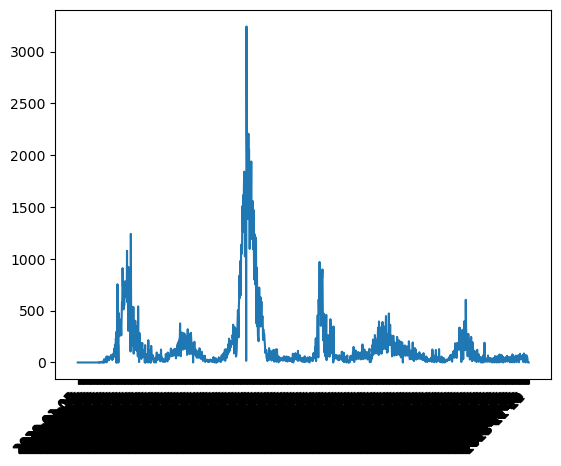

In [146]:
covid_selected = covid.query('location == "Afghanistan"')
plt.plot(covid_selected.date_str, covid_selected.new_cases)
plt.xticks(rotation=45, ha='right');

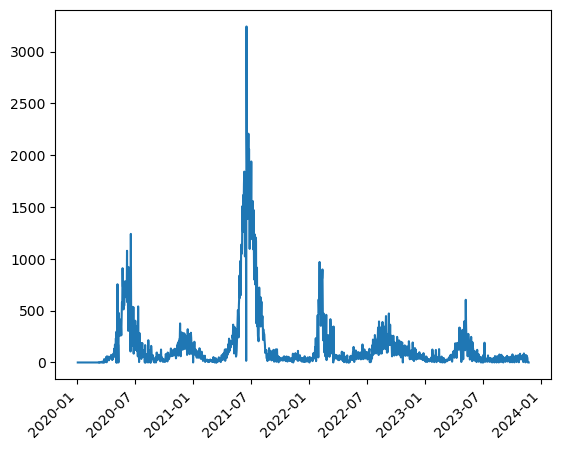

In [147]:
covid_selected = covid.query('location == "Afghanistan"')
plt.plot(covid_selected.date,  covid_selected.new_cases)
plt.xticks(rotation=45, ha='right');

## Полезные функции

In [148]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_normalized
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,-0.497811
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,-0.512660
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,-0.464532
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,-0.482888
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,-0.417971
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S,-0.493856
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C,1.312180
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S,-0.508183
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S,-0.493856


- `pd.crosstab`, `pd.pivot_table`

In [149]:
pd.crosstab(titanic.Sex, titanic.Embarked)

Embarked,C,Q,S
Sex,,,
female,40,24,88
male,62,22,182


In [150]:
pd.crosstab(titanic.Sex, titanic.Embarked, margins=True)

Embarked,C,Q,S,All
Sex,,,,
female,40,24,88,152
male,62,22,182,266
All,102,46,270,418


- `pd.qcut`

In [151]:
pd.qcut(titanic.Age, q=2)

0       (27.0, 76.0]
1       (27.0, 76.0]
2       (27.0, 76.0]
3      (0.169, 27.0]
4      (0.169, 27.0]
           ...      
413              NaN
414     (27.0, 76.0]
415     (27.0, 76.0]
416              NaN
417              NaN
Name: Age, Length: 418, dtype: category
Categories (2, interval[float64, right]): [(0.169, 27.0] < (27.0, 76.0]]

In [152]:
pd.qcut(titanic.Age, q=3, labels=['Young', 'Adult', 'Eldery'])

0      Eldery
1      Eldery
2      Eldery
3       Adult
4       Young
        ...  
413       NaN
414    Eldery
415    Eldery
416       NaN
417       NaN
Name: Age, Length: 418, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Eldery']

## Работа с NA

- **MCAR** (Missing Completely At Random) -> removing is easy
- **MAR** (Missing At Random) -> removing is a dangerous procedure, can introduce bias
- **MNAR** (Missing Not At Random): Structural Missing, Time-Dependent Missing

In [153]:
olympics.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
147615,74064,Mohamed Ajmal Malik,M,31.0,168.0,64.0,Kenya,KEN,1972 Summer,1972,Summer,Munich,Hockey,Hockey Men's Hockey,NaN
176153,88571,Einar lafsson,M,21.0,174.0,73.0,Iceland,ISL,1984 Winter,1984,Winter,Sarajevo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN
214432,107650,Heike Schulte-Mattler (Schmidt-),F,26.0,170.0,54.0,West Germany,FRG,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [154]:
olympics.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [155]:
olympics.shape

(271116, 15)

#### Drop 

In [156]:
olympics.dropna(axis=1).shape

(271116, 11)

In [157]:
olympics.dropna(axis=0).shape

(30181, 15)

In [158]:
olympics.dropna(axis=0, subset=['Age']).shape

(261642, 15)

In [159]:
olympics.Age

0         24.0
1         23.0
2         24.0
3         34.0
4         21.0
          ... 
271111    29.0
271112    27.0
271113    27.0
271114    30.0
271115    34.0
Name: Age, Length: 271116, dtype: float64

In [160]:
olympics['Age_cat'] = pd.qcut(olympics['Age'], q=3, labels=['Young', 'Adult', 'Eldery'])

#### Impute (replace, fill)

In [161]:
olympics.Medal.isna().sum()

231333

In [162]:
olympics.Medal.fillna('No medal').head(3)

0    No medal
1    No medal
2    No medal
Name: Medal, dtype: object

In [163]:
olympics.fillna({
                 'Medal': 'No medal',
                 'Age': -1
                }).head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_cat
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,Adult
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,Adult
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,Adult


In [164]:
olympics.Height.fillna(olympics.Height.mean()).head(3)

0    180.00000
1    170.00000
2    175.33897
Name: Height, dtype: float64

In [165]:
def my_func(vec):
    return vec.fillna(vec.mean())

olympics['Height_filled'] = olympics.groupby(['Age_cat', 'Sex'])['Height'].transform(my_func)

/tmp/ipykernel_2781/3468442802.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  olympics['Height_filled'] = olympics.groupby(['Age_cat', 'Sex'])['Height'].transform(my_func)


In [166]:
olympics['Height_filled'] = olympics.Height.ffill() # forward
olympics['Height_filled'] = olympics.Height.bfill() # backward
olympics['Height_filled'] = olympics.Height.interpolate(method='polynomial', order=2) # linear

In [167]:
# def my_func(vec):
#     return vec.interpolate(method='polynomial', order=56)

# olympics.groupby(['Age_cat', 'Sex'])['Height'].transform(my_func)

## Слияние датафреймов

In [168]:
df1 = pd.DataFrame({'Fruit': ['apple', 'banana', 'cherry', 'orange'],
                    'Count': [3, 5, 2, 4], 'Weight': [10, 15, 3, 18]}).set_index('Fruit')

df2 = pd.DataFrame({'Fruit': ['banana', 'orange', 'pear', 'watermelon'],
                    'Price': [1.5, 2.0, 3.0, 5.0],
                    'Count': [10, 11, 21, 1]}).set_index('Fruit')

display(df1)
display(df2)

,Count,Weight
Fruit,,
apple,3,10
banana,5,15
cherry,2,3
orange,4,18


,Price,Count
Fruit,,
banana,1.5,10
orange,2.0,11
pear,3.0,21
watermelon,5.0,1


#### `pd.concat`

In [169]:
pd.concat([df1, df2])

,Count,Weight,Price
Fruit,,,
apple,3,10.0,NaN
banana,5,15.0,NaN
cherry,2,3.0,NaN
orange,4,18.0,NaN
banana,10,NaN,1.5
orange,11,NaN,2.0
pear,21,NaN,3.0
watermelon,1,NaN,5.0


In [170]:
pd.concat([df1, df2], axis=1)

,Count,Weight,Price,Count
Fruit,,,,
apple,3.0,10.0,NaN,NaN
banana,5.0,15.0,1.5,10.0
cherry,2.0,3.0,NaN,NaN
orange,4.0,18.0,2.0,11.0
pear,NaN,NaN,3.0,21.0
watermelon,NaN,NaN,5.0,1.0


In [171]:
df = pd.DataFrame(columns=['chr', 'start', 'stop', 'reads_counts'])
for x in range(1,5):
    ...
    new_row = pd.DataFrame([[1, 2, 3, x]],columns=['chr', 'start', 'stop', 'reads_counts'], index=[x])
    print(new_row)
    df = pd.concat([df, new_row])

   chr  start  stop  reads_counts
1    1      2     3             1
   chr  start  stop  reads_counts
2    1      2     3             2
   chr  start  stop  reads_counts
3    1      2     3             3
   chr  start  stop  reads_counts
4    1      2     3             4


In [172]:
df

,chr,start,stop,reads_counts
1,1,2,3,1
2,1,2,3,2
3,1,2,3,3
4,1,2,3,4


#### `merge`

In [173]:
display(df1)
display(df2)

,Count,Weight
Fruit,,
apple,3,10
banana,5,15
cherry,2,3
orange,4,18


,Price,Count
Fruit,,
banana,1.5,10
orange,2.0,11
pear,3.0,21
watermelon,5.0,1


In [174]:
df1.merge(df2, on='Fruit')

,Count_x,Weight,Price,Count_y
Fruit,,,,
banana,5,15,1.5,10
orange,4,18,2.0,11


In [175]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'])

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
banana,5,15,1.5,10
orange,4,18,2.0,11


In [176]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'], how='inner')

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
banana,5,15,1.5,10
orange,4,18,2.0,11


In [177]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'], how='left')

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
apple,3,10,NaN,NaN
banana,5,15,1.5,10.0
cherry,2,3,NaN,NaN
orange,4,18,2.0,11.0


In [178]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'], how='right')

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
banana,5.0,15.0,1.5,10
orange,4.0,18.0,2.0,11
pear,NaN,NaN,3.0,21
watermelon,NaN,NaN,5.0,1


In [179]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'], how='outer')

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
apple,3.0,10.0,NaN,NaN
banana,5.0,15.0,1.5,10.0
cherry,2.0,3.0,NaN,NaN
orange,4.0,18.0,2.0,11.0
pear,NaN,NaN,3.0,21.0
watermelon,NaN,NaN,5.0,1.0


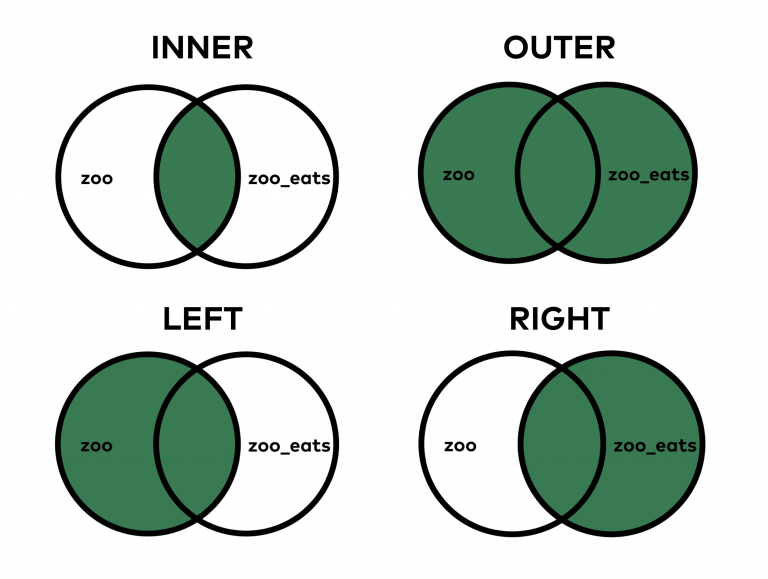

In [180]:
df1 = pd.DataFrame({'Fruit': ['banana', 'banana', 'cherry', 'orange'],
                    'Count': [3, 5, 2, 4], 'Weight': [10, 15, 3, 18]}).set_index('Fruit')

df2 = pd.DataFrame({'Fruit': ['banana', 'orange', 'pear', 'watermelon'],
                    'Price': [5, 2, 3, 5],
                    'Count': [5, 11, 21, 1]}).set_index('Fruit')

display(df1)
display(df2)

,Count,Weight
Fruit,,
banana,3,10
banana,5,15
cherry,2,3
orange,4,18


,Price,Count
Fruit,,
banana,5,5
orange,2,11
pear,3,21
watermelon,5,1


In [181]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'], how='inner')

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
banana,3,10,5,5
banana,5,15,5,5
orange,4,18,2,11


In [182]:
df1.merge(df2, on=['Fruit', 'Count'], suffixes=['_df1', '_df2'], how='inner')

,Count,Weight,Price
Fruit,,,
banana,5,15,5


In [183]:
df1.merge(df2, on=['Fruit', 'Count'], suffixes=['_df1', '_df2'], how='left')

,Count,Weight,Price
Fruit,,,
banana,3,10,NaN
banana,5,15,5.0
cherry,2,3,NaN
orange,4,18,NaN


## Немного статистики

- [SciPy](https://scipy.org/)
- [statsmodels](https://www.statsmodels.org/stable/)
- [pingouin](https://pingouin-stats.org/build/html/index.html)
- [scikit-learn](https://scikit-learn.org/stable/index.html)


In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy import stats, interpolate

def calculate_vif(x):
    vif_data = pd.DataFrame()
    vif_data["feature"] = x.columns
    vif_data["vif"] = [vif(x.values, i)
                            for i in range(len(x.columns))]
    return vif_data

In [185]:
titanic.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_normalized
173,1065,3,"Torfa, Mr. Assad",male,NaN,0,0,7.2292,NaN,C,-0.508555
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,26.0000,NaN,S,-0.172405
156,1048,1,"Bird, Miss. Ellen",female,29.0,0,0,221.7792,C97,S,3.333638


In [186]:
calculate_vif(titanic.select_dtypes('number').dropna())

,feature,vif
0,PassengerId,1.010145
1,Pclass,1.858437
2,Age,1.373649
3,SibSp,1.159999
4,Parch,1.224546
5,Fare,497.521396
6,Fare_normalized,355.251953


In [187]:
calculate_vif(titanic.select_dtypes('number').dropna().drop(columns='Fare'))

,feature,vif
0,PassengerId,18.588033
1,Pclass,10.582418
2,Age,6.321004
3,SibSp,1.512082
4,Parch,1.520839
5,Fare_normalized,1.676077


In [188]:
titanic.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_normalized
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,-0.497811
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,-0.512660
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,-0.464532


In [189]:
pg.corr(titanic.Fare , titanic.Age)

,n,r,CI95%,p-val,BF10,power
pearson,331,0.337932,"[0.24, 0.43]",2.763372e-10,2.811e+07,0.999995


In [190]:
corr_data = pg.corr(titanic.Fare , titanic.Age)
corr_data.loc['pearson', 'r']

0.33793158455199207

In [191]:
print(pg.normality(titanic.Fare, alpha=.05))

             W          pval  normal
Fare  0.539302  1.377182e-31   False


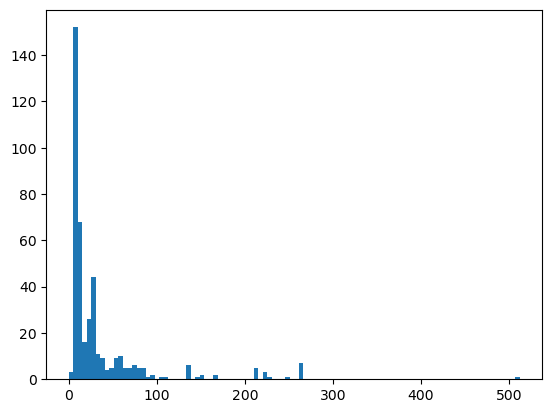

In [192]:
plt.hist(titanic.Fare, bins=100);

In [193]:
print(pg.normality(titanic.Fare_normalized, alpha=.05))

                        W          pval  normal
Fare_normalized  0.539302  1.377167e-31   False


In [194]:
print(pg.normality(np.log(titanic.Fare + 1), alpha=.05))

             W          pval  normal
Fare  0.888214  7.391524e-17   False


In [195]:
pg.ttest(titanic.Fare, 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,13.013044,416,two-sided,1.022237e-32,"[30.25, 41.01]",0.637252,2.562e+29,1.0


In [196]:
x = titanic.query('Sex == "male"')['Fare']
y = titanic.query('Sex == "female"')['Fare']

In [197]:
pg.ttest(x, y)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.447868,206.764522,two-sided,0.000685,"[-34.93, -9.51]",0.404447,32.646,0.977563


In [198]:
titanic.dtypes

PassengerId           int64
Pclass                int64
Name                 object
Sex                category
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Cabin                object
Embarked             object
Fare_normalized     float64
dtype: object

In [199]:
titanic = titanic.dropna()


model = smf.ols("Fare ~ Sex + Age + Pclass + Parch", titanic)
results = model.fit()

In [200]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     7.094
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           5.90e-05
Time:                        22:20:31   Log-Likelihood:                -499.72
No. Observations:                  87   AIC:                             1009.
Df Residuals:                      82   BIC:                             1022.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     140.8781     41.764      3.373      

In [201]:
model = smf.ols("Fare ~ Sex + Age + Pclass + Parch + 0", titanic)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     7.094
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           5.90e-05
Time:                        22:20:31   Log-Likelihood:                -499.72
No. Observations:                  87   AIC:                             1009.
Df Residuals:                      82   BIC:                             1022.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Sex[female]   140.8781     41.764      3.373      

In [202]:
results.params

Sex[female]    140.878100
Sex[male]      124.453548
Age              0.263019
Pclass         -55.955156
Parch           38.734385
dtype: float64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Sex[female]'),
  Text(1, 0, 'Sex[male]'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Pclass'),
  Text(4, 0, 'Parch')])

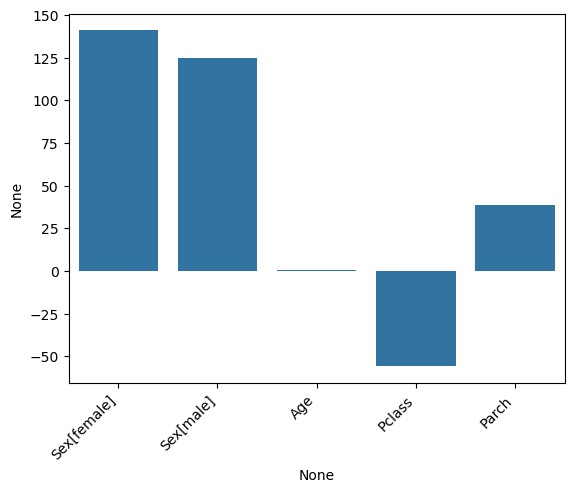

In [203]:
sns.barplot(x=results.params.index, y=results.params)
plt.xticks(rotation=45, ha='right')

In [204]:
model = smf.ols("Fare ~ Sex + Age + Pclass + Parch", titanic).fit()

In [205]:
model.predict

<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x7f9ed1628510>>

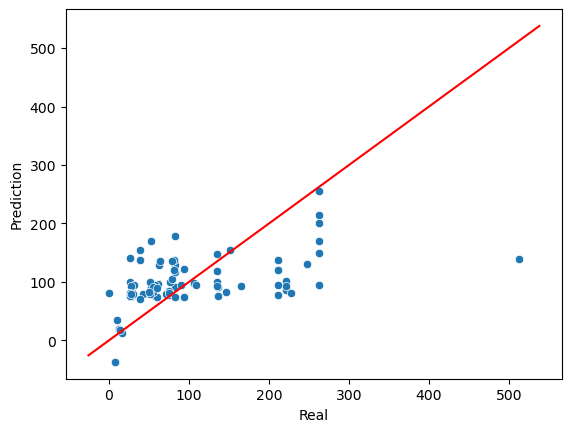

In [206]:
pred = model.get_prediction(titanic).predicted_mean

#target_pred = prediction_result.predicted_mean
sns.scatterplot(y = pred, x = titanic.Fare);

plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), color='red')
plt.xlabel("Real")
plt.ylabel("Prediction");

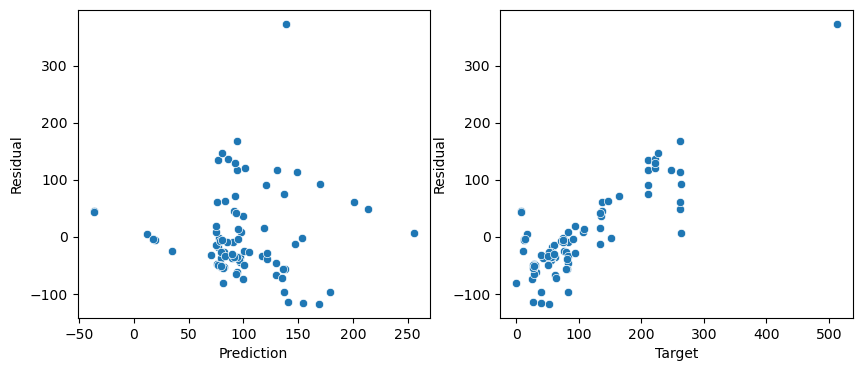

In [207]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
resid = titanic.Fare - pred
sns.scatterplot(x=pred, y=resid, ax=ax1)
ax1.set_xlabel("Prediction");
ax1.set_ylabel("Residual");

sns.scatterplot(x=titanic.Fare, y=resid, ax=ax2, )
ax2.set_xlabel("Target");
ax2.set_ylabel("Residual");

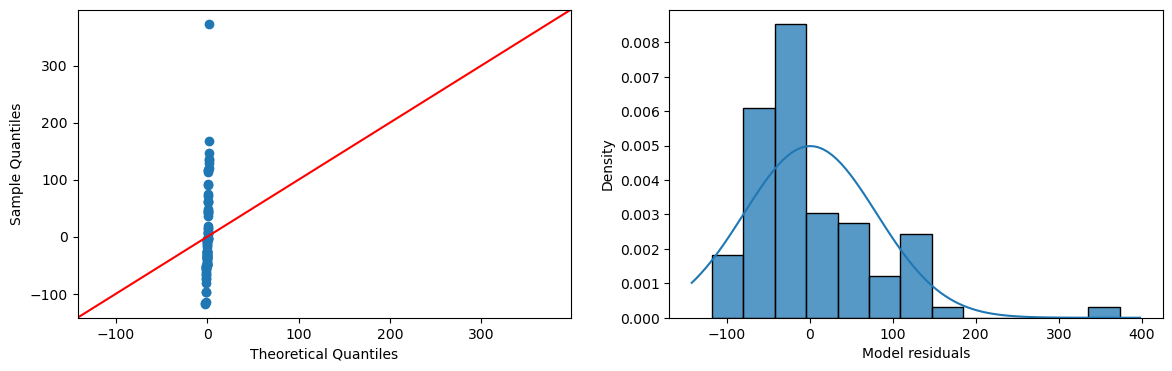

In [208]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))

sm.qqplot(resid, line='45', ax=ax1);

ax2 = sns.histplot(resid, stat='density');
x = np.random.normal(resid.mean(), resid.std(), size=1000)
mu, std = stats.norm.fit(x)
xx = np.linspace(*ax2.get_xlim(), num=100)
ax2.plot(xx, stats.norm.pdf(xx, mu, std));
ax2.set_xlabel('Model residuals');